In [1]:
# Setting up yolov5 evenironment
%pip install git-lfs
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v6.0-185-g9b13a59 torch 1.10.0+cu111 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/107.7 GB disk)


In [2]:
# Cloning repository containing Training & Testing Dataset
%cd -
!git clone https://github.com/Pburns18/NHLAdDetection.git

/content
Cloning into 'NHLAdDetection'...
remote: Enumerating objects: 414, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 414 (delta 2), reused 30 (delta 1), pack-reused 383
Receiving objects: 100% (414/414), 323.21 MiB | 13.47 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (503/503), done.


In [3]:
# Gathering Model from google drive
# This is being done outside of github because of errors when downloading
# model from github
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3', cache_discovery=False)
import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId='1lMq-nZtCu0X2v9wNx1ojLkPzR3_UUUQi')
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  status, done = downloader.next_chunk()
  print('Download %:', int(status.progress() * 100))

downloaded.seek(0)

with open("model.pt", "wb") as outfile:
    outfile.write(downloaded.getbuffer())

No project ID could be determined. Consider running `gcloud config set project` or setting the GOOGLE_CLOUD_PROJECT environment variable


Download %: 68
Download %: 100






---


**Exploring results from final round of training which was done locally outside
of this notebook on a custom dataset**


---




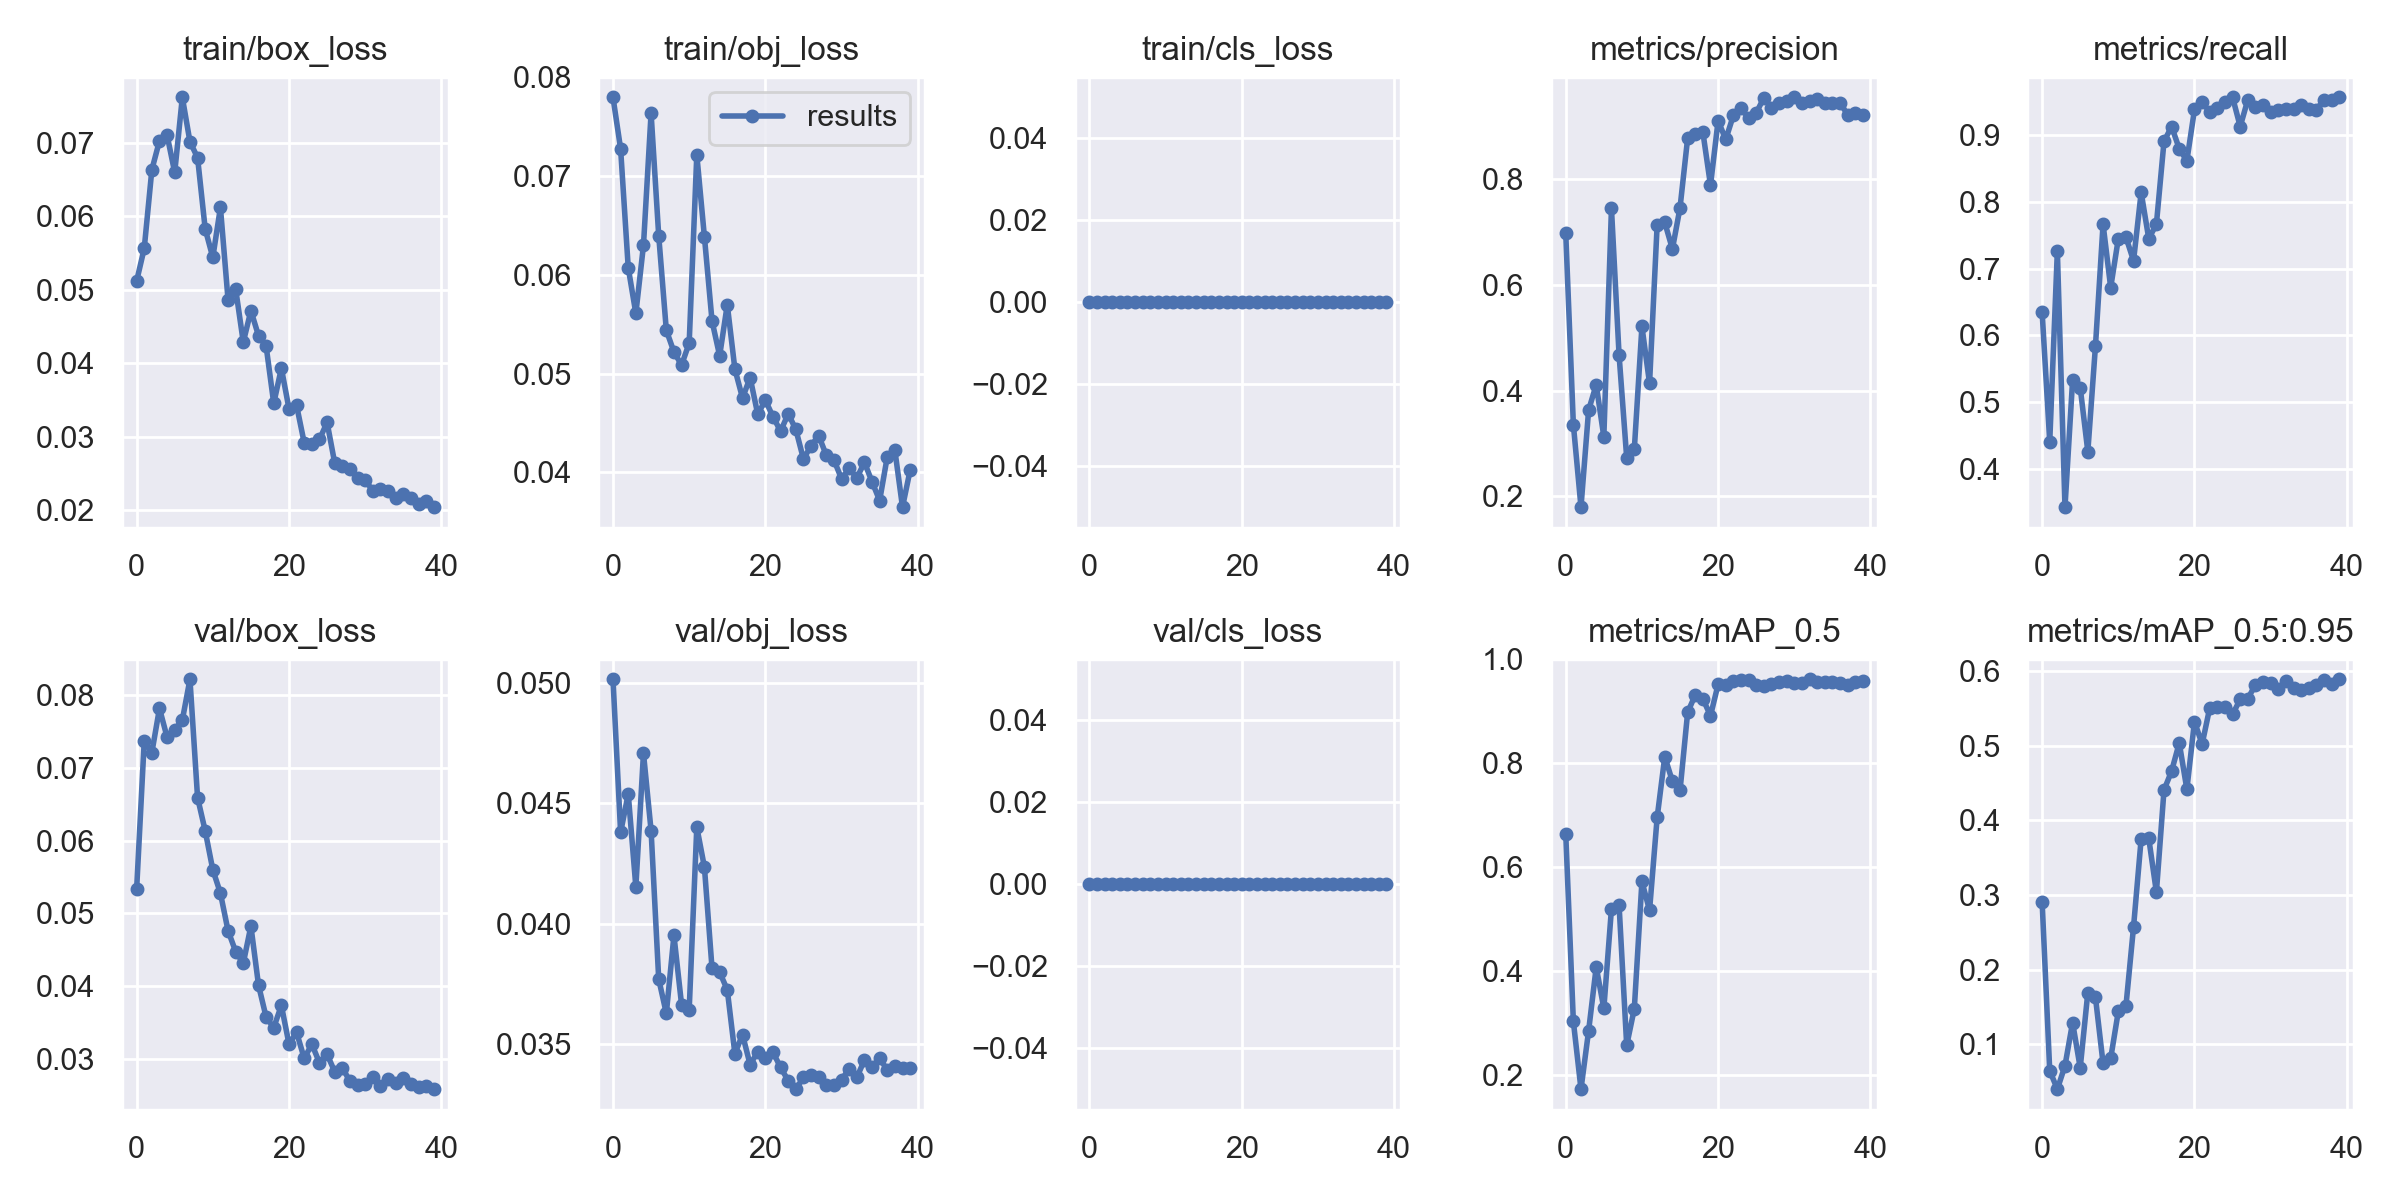

In [4]:
from IPython.display import Image
display.display(Image('NHLAdDetection/FinalTrainingResults/results.png'))



---


**Training Batch example**


---


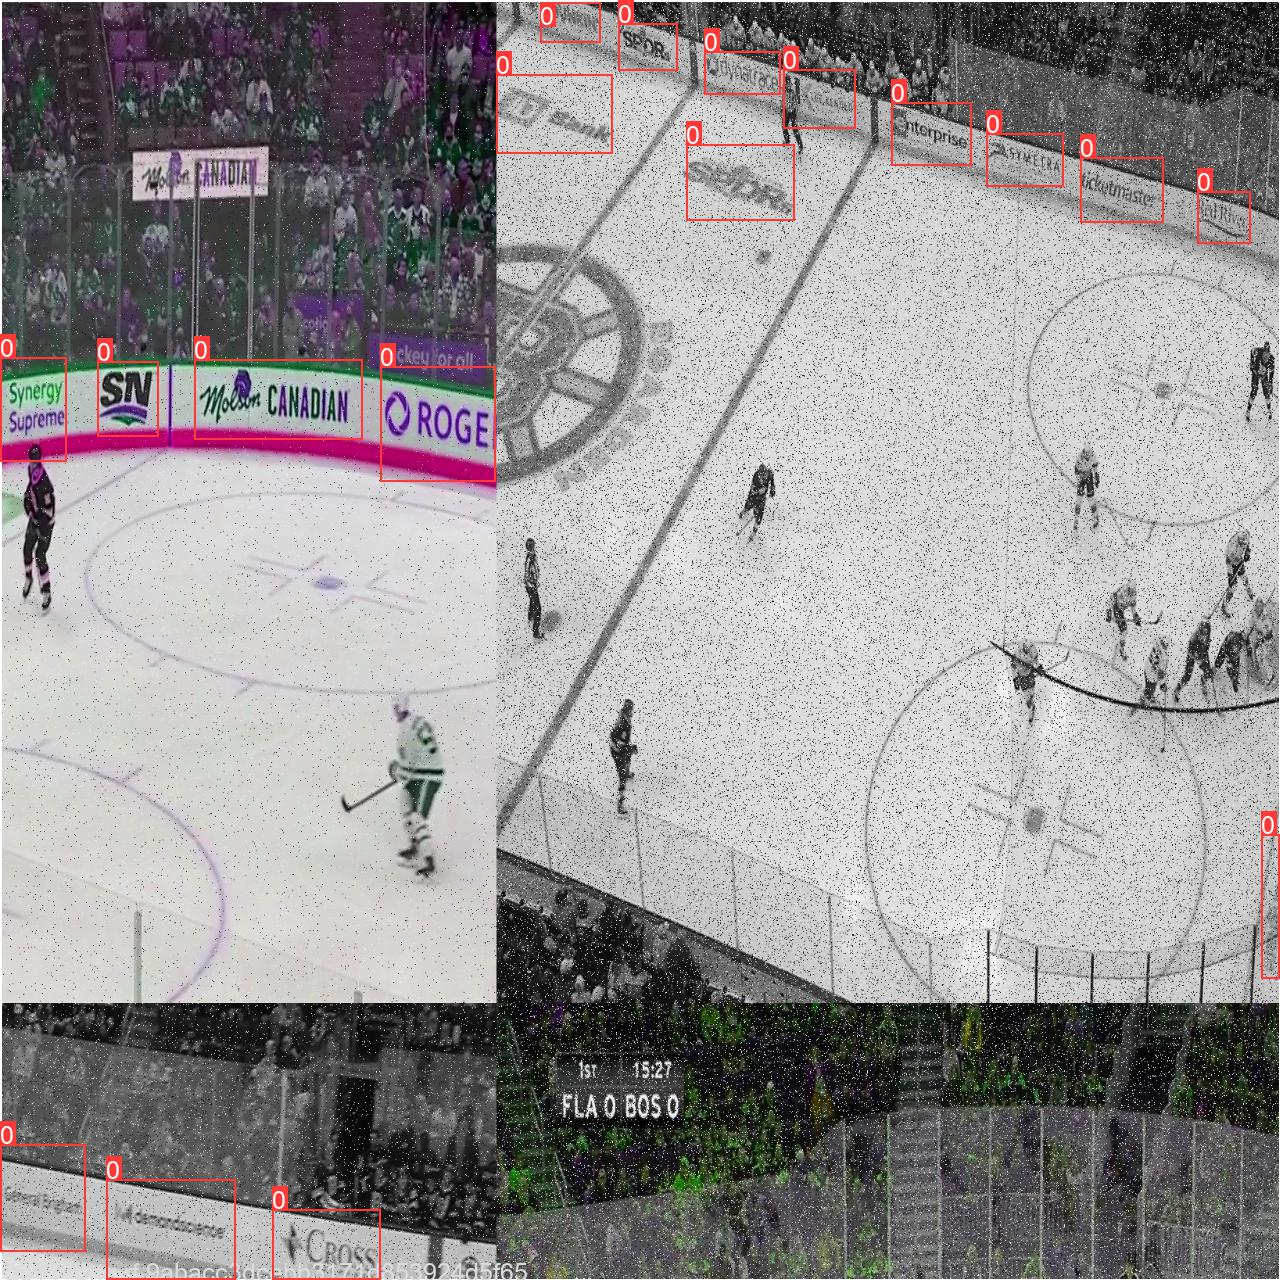

In [5]:
display.display(Image('NHLAdDetection/FinalTrainingResults/train_batch0.jpg', width=800, height=500))



---


**Validation Batch Labels Example**


---



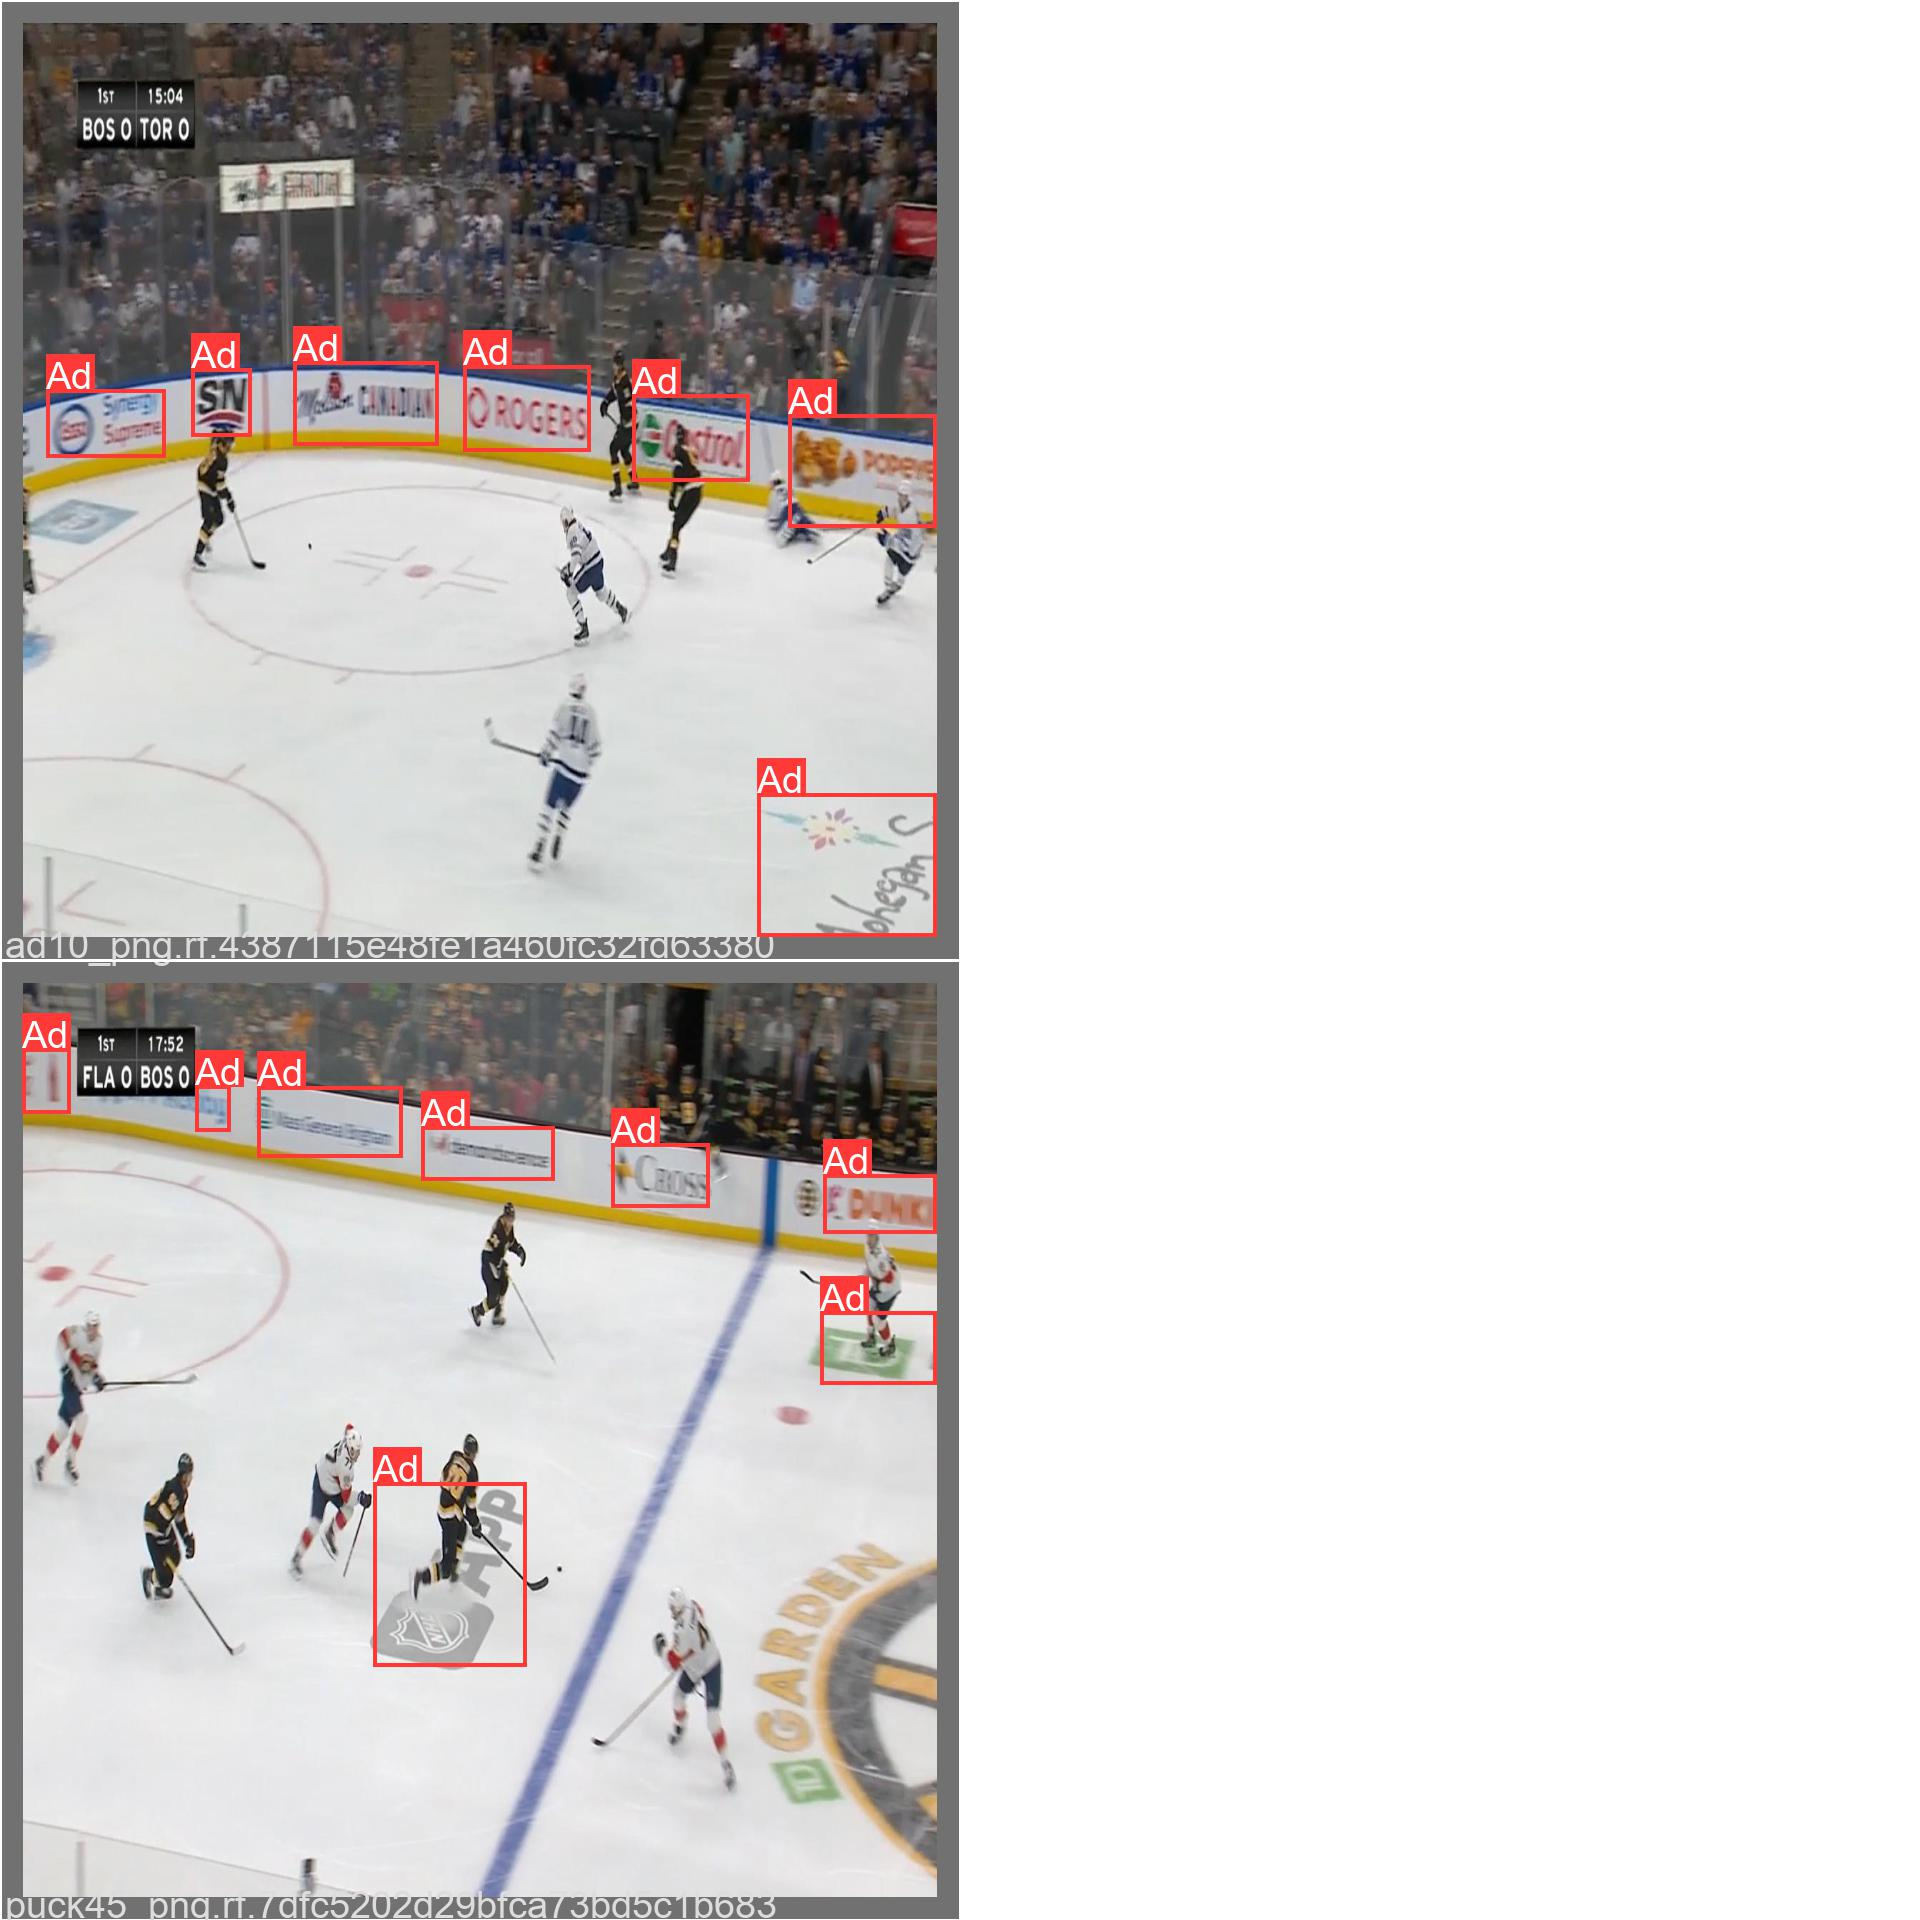

In [6]:
display.display(Image('NHLAdDetection/FinalTrainingResults/val_batch0_labels.jpg', width=800, height=500))



---


**Validation Batch Predictions Example**


---



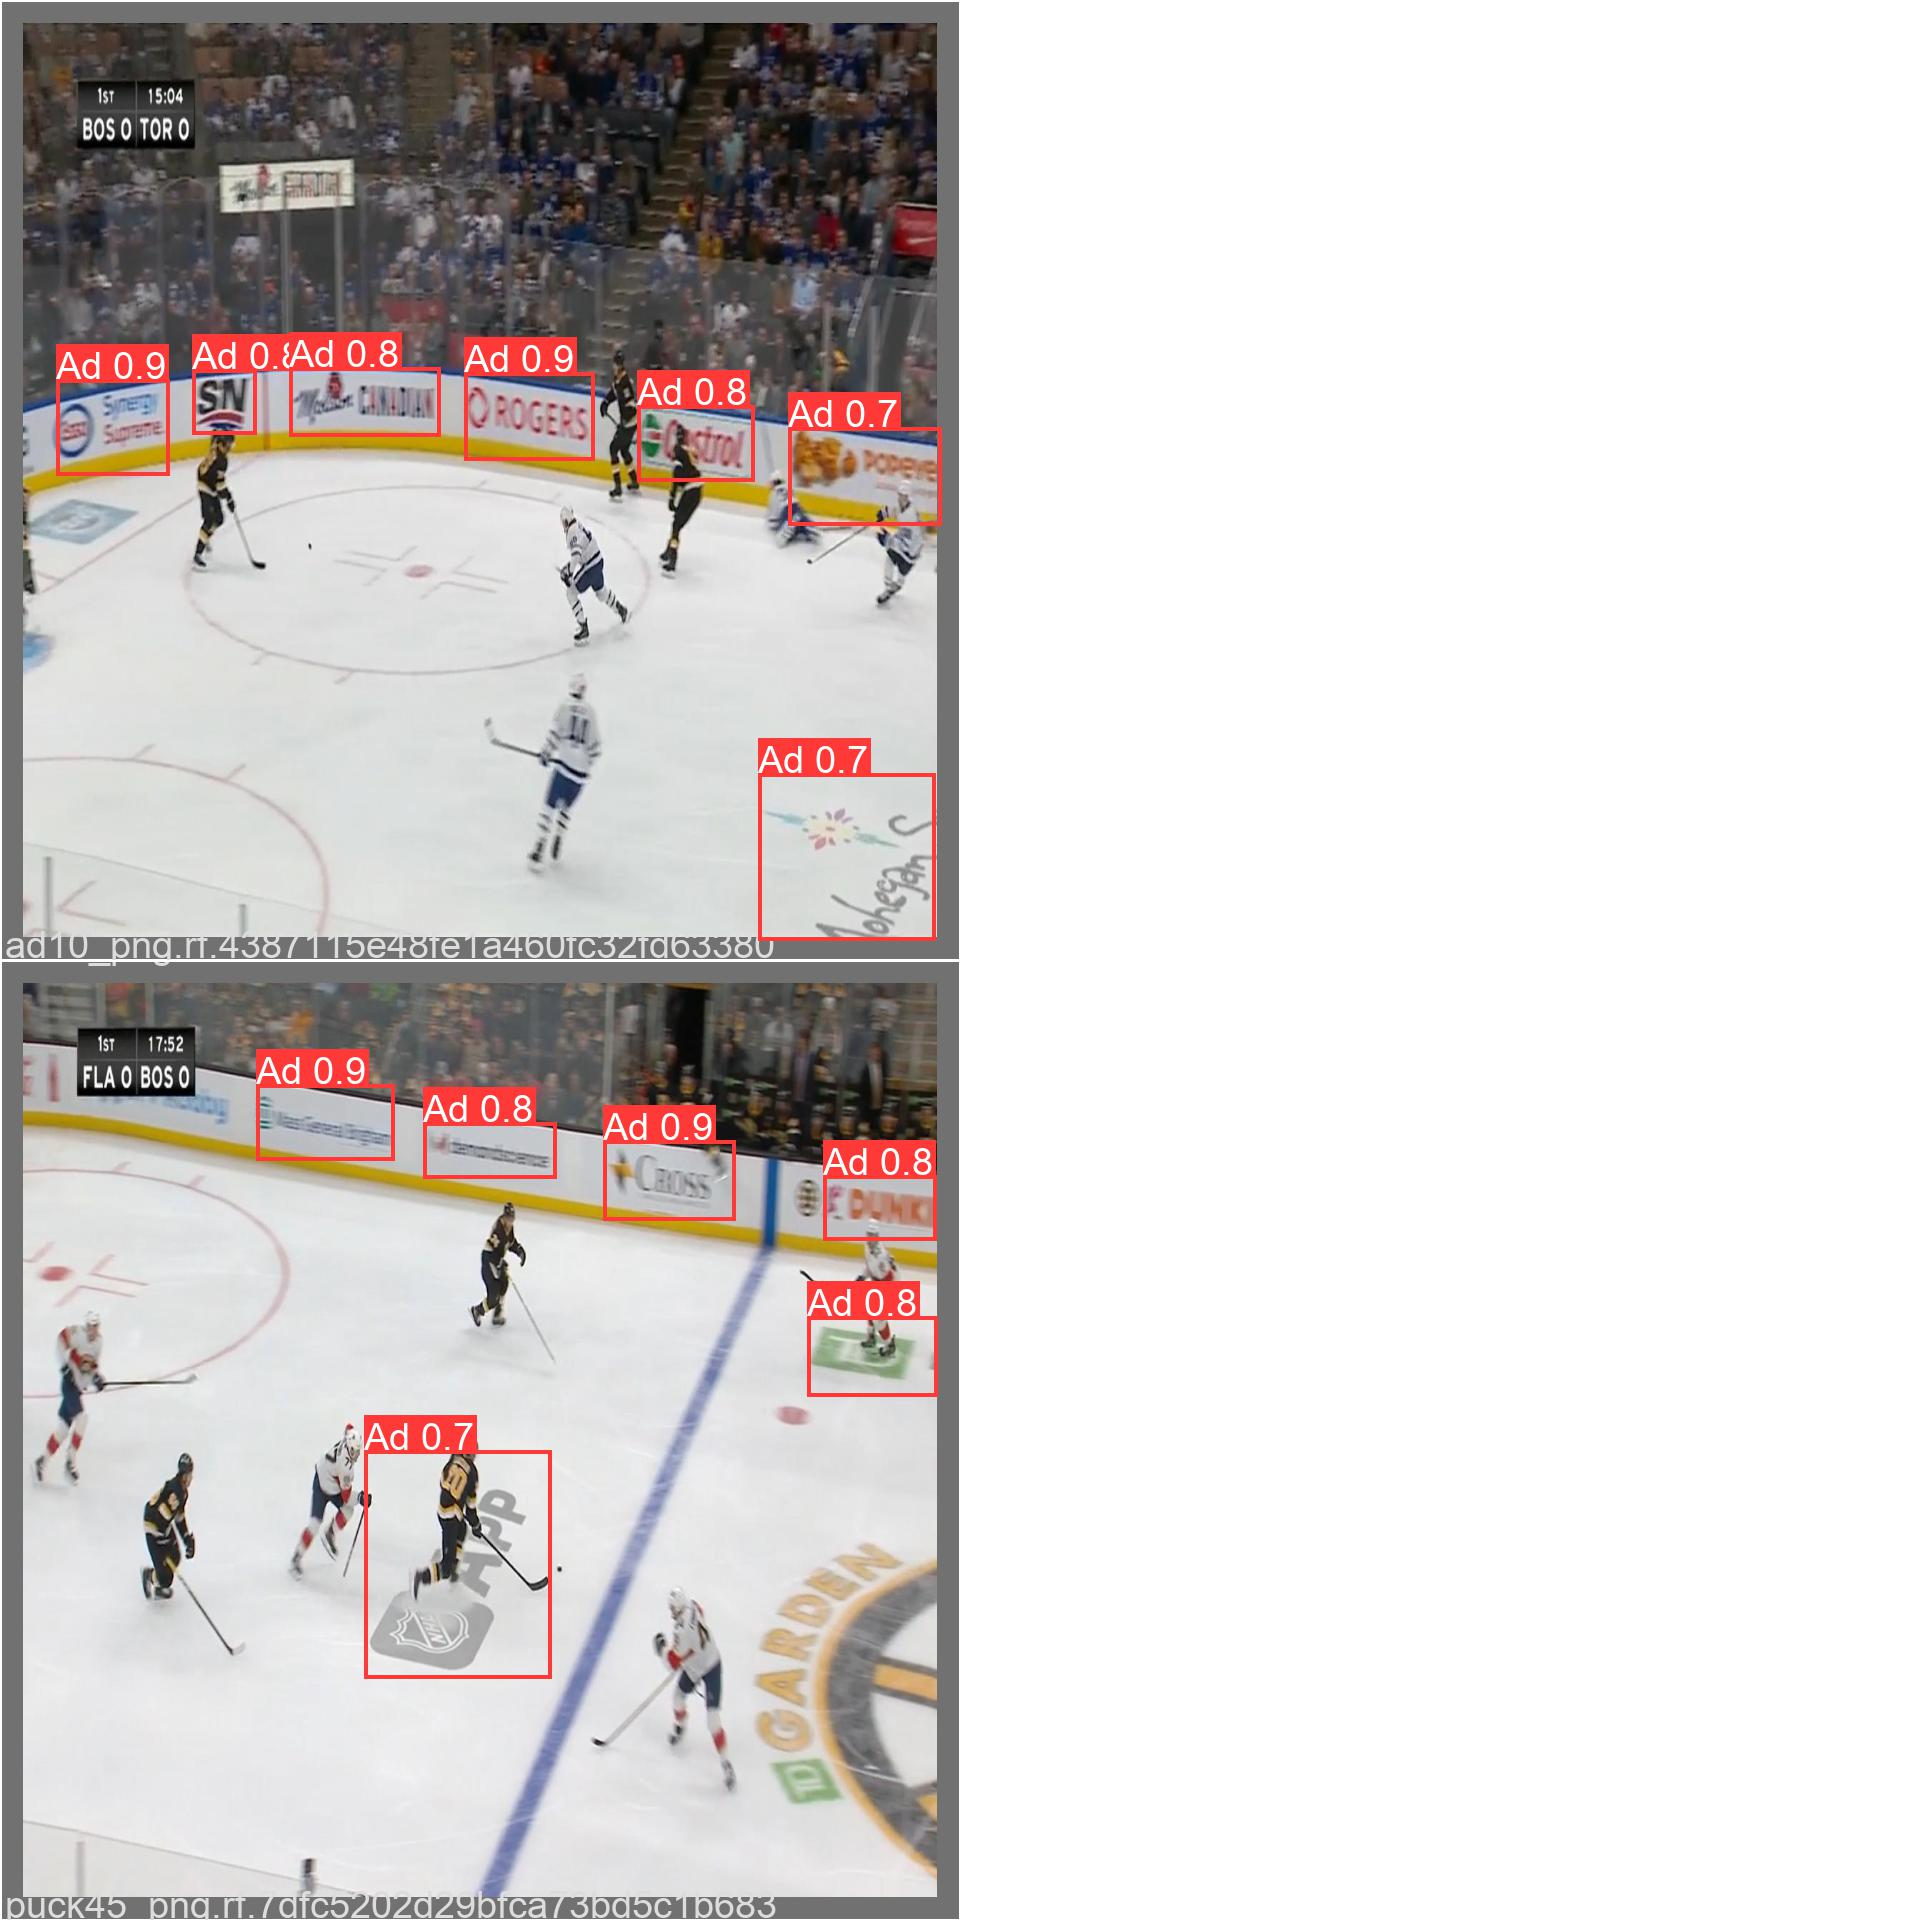

In [7]:
display.display(Image('NHLAdDetection/FinalTrainingResults/val_batch0_pred.jpg', width=800, height=500))



---


**Running a detection example with the trained model on some fresh testing images**


---



In [8]:
!python yolov5/detect.py --weights model.pt --img 1280 --conf 0.75 --source NHLAdDetection/AdTestData/

detect: weights=['model.pt'], source=NHLAdDetection/AdTestData/, data=yolov5/data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.75, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-185-g9b13a59 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 476 layers, 76118664 parameters, 0 gradients, 110.0 GFLOPs
image 1/89 /content/NHLAdDetection/AdTestData/ad-20.png: 768x1280 4 Ads, Done. (4.427s)
image 2/89 /content/NHLAdDetection/AdTestData/ad-21.png: 768x1280 3 Ads, Done. (4.315s)
image 3/89 /content/NHLAdDetection/AdTestData/ad-210.png: 768x1280 7 Ads, Done. (4.284s)
image 4/89 /content/NHLAdDetection/AdTestData/ad-211.png: 768x1280 1 Ad, Done. (4.292s)
image 5/89 /content/NHLAdDetection/AdTestD



---

**Displaying some example images from the detection run**

---



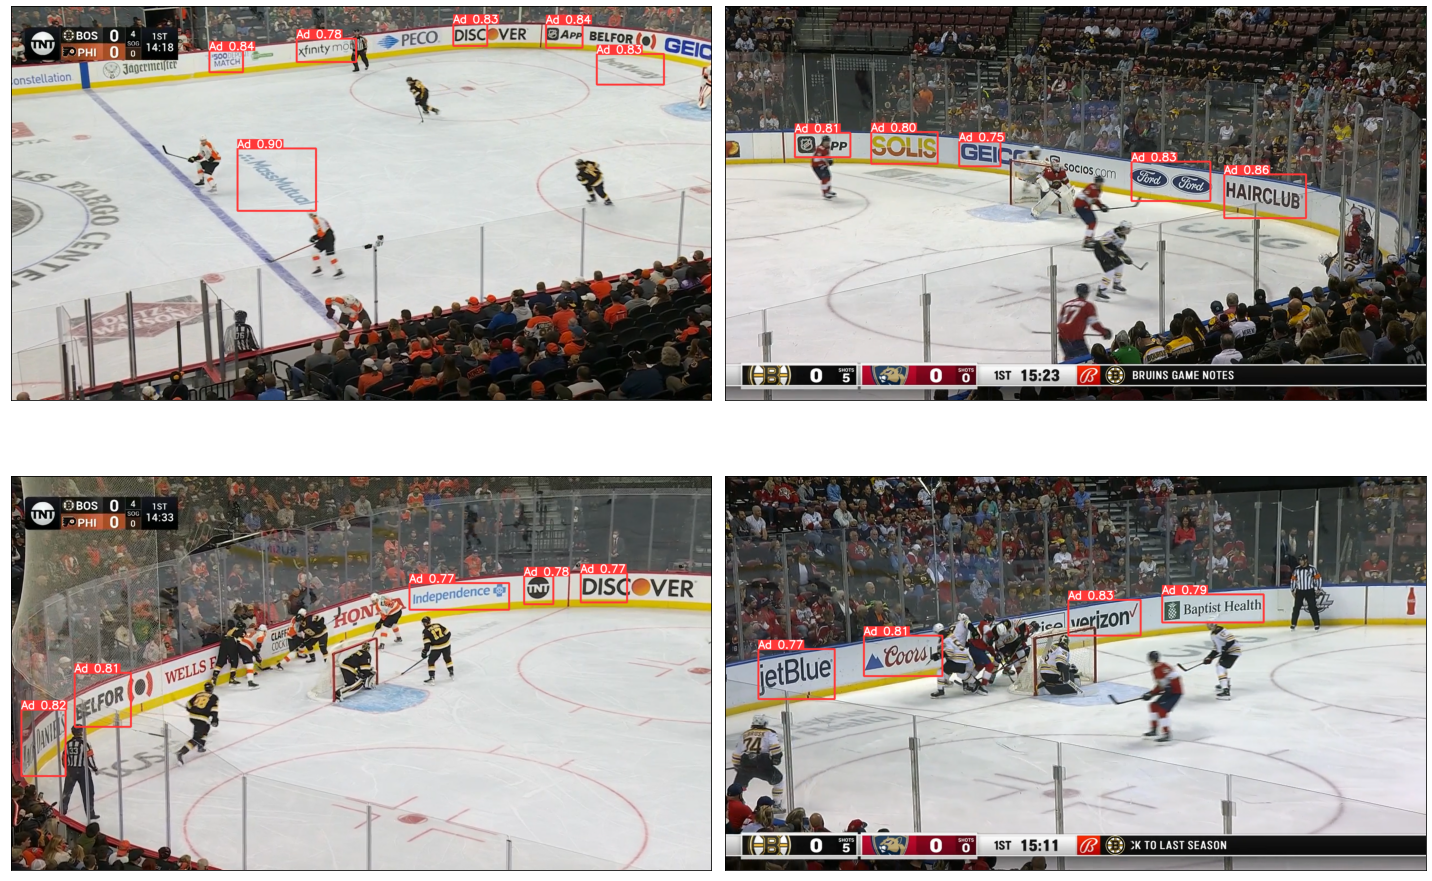

In [9]:
import cv2
from matplotlib import pyplot as plt

# Creating a figure to display example detection images
fig = plt.figure(figsize=(20, 14))

# Reading in images from detection example
detect_ex1 = cv2.cvtColor(cv2.imread('yolov5/runs/detect/exp/ad-213.png'), cv2.COLOR_BGR2RGB)
detect_ex2 = cv2.cvtColor(cv2.imread('yolov5/runs/detect/exp/ad9.png'), cv2.COLOR_BGR2RGB)
detect_ex3 = cv2.cvtColor(cv2.imread('yolov5/runs/detect/exp/ad-26.png'), cv2.COLOR_BGR2RGB)
detect_ex4 = cv2.cvtColor(cv2.imread('yolov5/runs/detect/exp/ad15.png'), cv2.COLOR_BGR2RGB)

# Using matplot lib suplot to display results in one image
fig.add_subplot(2, 2, 1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(detect_ex1)

fig.add_subplot(2, 2, 2)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(detect_ex2)

fig.add_subplot(2, 2, 3)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(detect_ex3)

fig.add_subplot(2, 2, 4)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(detect_ex4)

fig.tight_layout()

plt.show()